<a href="https://colab.research.google.com/github/claradelatorre/MLData/blob/main/SARIMAX_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install skforecast
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install skforecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.4/384.4 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://u

In [3]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [5]:
from google.colab import files

uploaded = files.upload()

Saving Estimacion02vFINAL.xlsx to Estimacion02vFINAL.xlsx


In [9]:
#Data from Excel

data= pd.read_excel('Estimacion02vFINAL.xlsx')

In [40]:
data.head()

,date,NumeroOperacionesAutorizacion
0,2020-01-01,7.073243e+06
1,2020-01-02,1.439431e+07
2,2020-01-03,1.572396e+07
3,2020-01-04,2.074759e+07
4,2020-01-05,1.195341e+07


In [41]:
data=data.rename(columns={'FechaEntradaAutorizacion': 'date'})

data['date'] =pd.to_datetime(data['date'], format='%Y/%m/%d')
data.head()

,date,NumeroOperacionesAutorizacion
0,2020-01-01,7.073243e+06
1,2020-01-02,1.439431e+07
2,2020-01-03,1.572396e+07
3,2020-01-04,2.074759e+07
4,2020-01-05,1.195341e+07


In [42]:
time_series = pd.Series(data['NumeroOperacionesAutorizacion'].values, index=data['date'])

In [43]:
order=(2,1,2)
seasonal_order = (1,0,1,12)
model = SARIMAX(time_series, order= order, seasonal_order= seasonal_order)
model_fit= model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [44]:
black_friday_2022= pd.to_datetime('2022-11-25')

In [45]:
prediction = model_fit.get_prediction(start=pd.to_datetime('2022-11-25'), end= pd.to_datetime('2022-11-25'))
predicted_value=prediction.predicted_mean[0]

In [46]:
print("El número de operaciones para el Black Friday es: ", round(predicted_value))

El número de operaciones para el Black Friday es:  22307340


In [ ]:
#Menos del 5% error MAPE buena predicción

In [50]:
actual_value=time_series.loc[black_friday_2022]
mape=np.abs((predicted_value-actual_value)/actual_value)*100
print(":", round(mape,2))

MAPE: 2.07


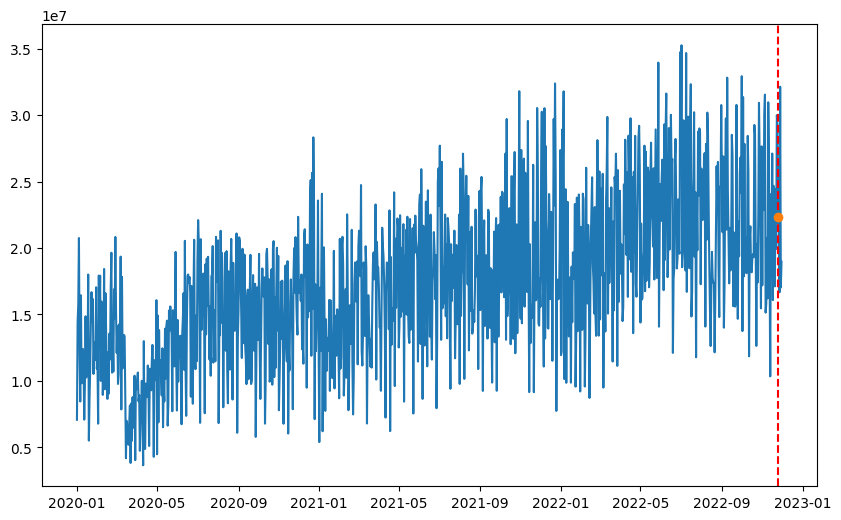

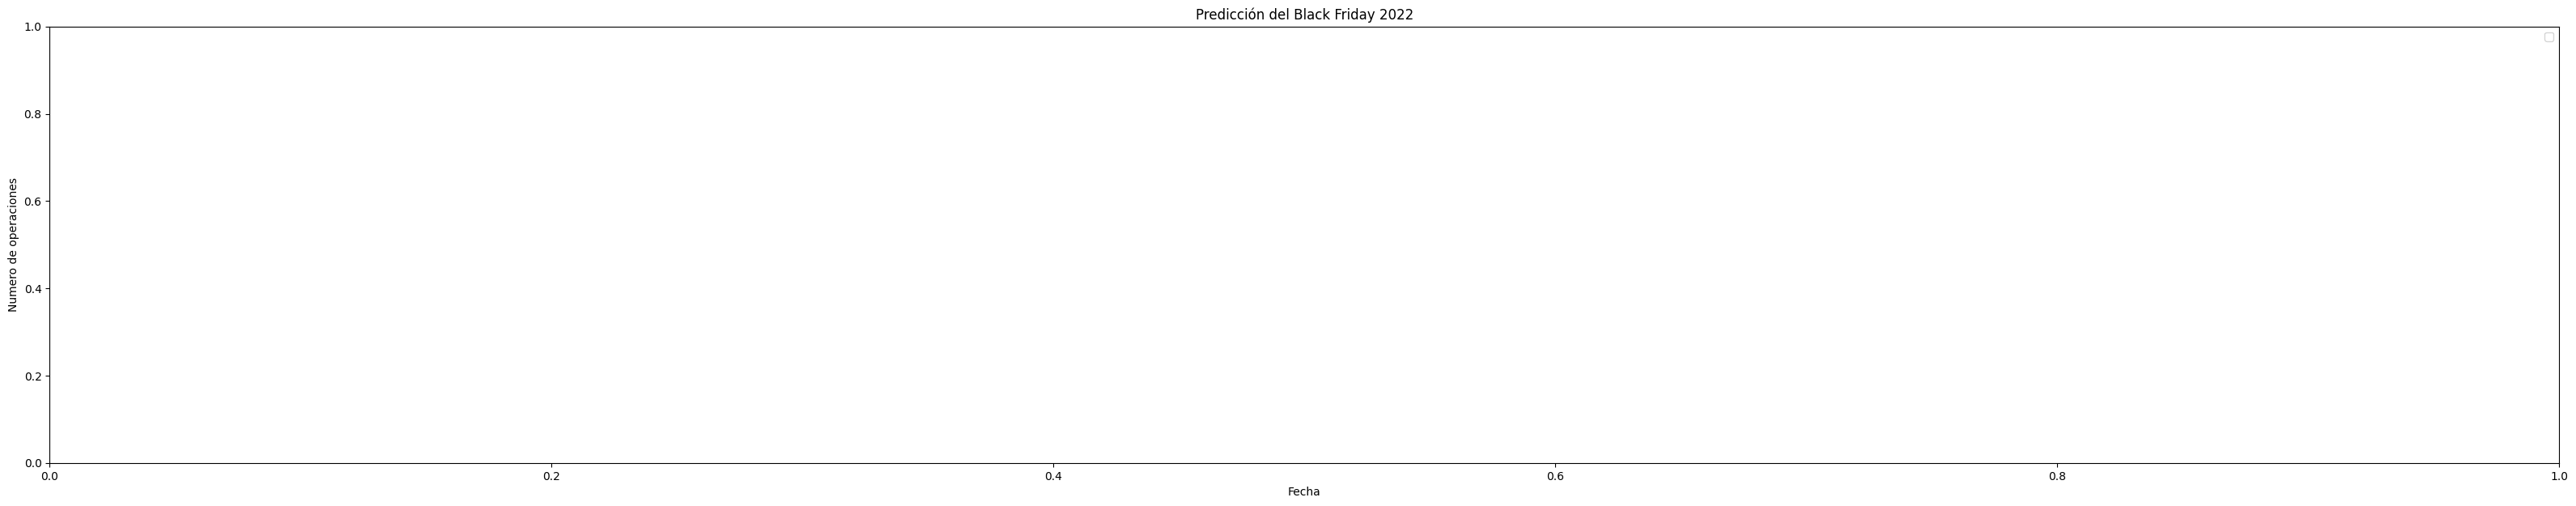

In [53]:
plt.plot(time_series.index, time_series.values, label='Datos reales')
plt.axvline(x=black_friday_2022, color='red', linestyle='--', label='Black Friday 2022')
plt.plot(black_friday_2022, predicted_value, marker='o', label='Predicción')
plt.figure(figsize=(40,7))
plt.xlabel('Fecha')
plt.ylabel('Numero de operaciones')
plt.title('Predicción del Black Friday 2022')
plt.legend()
plt.show()

In [ ]:
#Mejor ajuste de order y seasonal_order

In [18]:
import itertools

In [21]:
from statsmodels.tsa.stattools import arma_order_select_ic

In [25]:
p=range(0,3)

In [26]:
d= range(0,3)

In [27]:
q= range(0,3)

In [29]:

 
 pdq= list(itertools.product(p, d, q))
 seasonal_pdq= [(1,0,1,12)]

 best_aic= float ('inf')
 best_order= None
 best_seasonal_order= None

 for param in pdq: 
  for param_seasonal in seasonal_pdq:
    try: 
      model = SARIMAX(data['NumeroOperacionesAutorizacion'], order= param, seasonal_order= param_seasonal)
      model_fit= model.fit()
      aic= model_fit.aic

      if aic < best_aic:
        best_aic= aic
        best_order=param
        best_seasonal_order= param_seasonal
    except: 
      continue

print("Mejor orden (p,d,q):",best_order)
print("Mejor orden estacional (P,D,Q,S)", best_seasonal_order)
  


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10

Mejor orden (p,d,q): (2, 1, 2)
Mejor orden estacional (P,D,Q,S) (1, 0, 1, 12)
